In [45]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from random import randint

DIAG_VALUE = 3
ONE_FROM_DIAG_VALUE = 1
TWO_FROM_DIAG_VALUE = 0.2

In [46]:
def gen_matrix(dim=10):
    array = np.full((dim, dim), 0, dtype=float)
    for i in range(dim):
        for j in range(dim):
            if i == j:
                array[i][j] = DIAG_VALUE
            if abs(i - j) == 1:
                array[i][j] = ONE_FROM_DIAG_VALUE
            if abs(i - j) == 2:
                array[i][j] = TWO_FROM_DIAG_VALUE            

    return array

gen_matrix()

array([[3. , 1. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 3. , 1. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 1. , 3. , 1. , 0.2, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 1. , 3. , 1. , 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 1. , 3. , 1. , 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 1. , 3. , 1. , 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.2, 1. , 3. , 1. , 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2, 1. , 3. , 1. , 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.2, 1. , 3. , 1. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 1. , 3. ]])

In [47]:
def euclidean_distance(x1: list, x2: list):
    return sqrt(sum([(x1_cord - x2_cord)**2 for x1_cord, x2_cord in zip(x1, x2)]))


In [54]:
def solve_jacobi(dim, prev_vector=None, max_iter=100, error=10**-7, free_term=None):
    if prev_vector == None:
        prev_vector = [randint(1, 100) for _ in range(dim)]
    if free_term == None:
        free_term = [i for i in range(1, dim+1)]      
        
    def iteration(previous):
        cur_vector = [(free_term[0] - ONE_FROM_DIAG_VALUE*prev_vector[1] - TWO_FROM_DIAG_VALUE*prev_vector[2]) / DIAG_VALUE, (free_term[1] - ONE_FROM_DIAG_VALUE*prev_vector[0] - ONE_FROM_DIAG_VALUE*prev_vector[2] - TWO_FROM_DIAG_VALUE*prev_vector[3]) / DIAG_VALUE]
        for i in range(2, dim-2):
            cord = (free_term[i] - TWO_FROM_DIAG_VALUE*prev_vector[i-2] - ONE_FROM_DIAG_VALUE*prev_vector[i-1] - ONE_FROM_DIAG_VALUE*prev_vector[i+1] - TWO_FROM_DIAG_VALUE*prev_vector[i+2]) / DIAG_VALUE
            cur_vector.append(cord)
        cur_vector.append((free_term[-2] - TWO_FROM_DIAG_VALUE*prev_vector[-4] - ONE_FROM_DIAG_VALUE*prev_vector[-3] - ONE_FROM_DIAG_VALUE*prev_vector[-1]) / DIAG_VALUE)
        cur_vector.append((free_term[-1] - TWO_FROM_DIAG_VALUE*prev_vector[-3] - ONE_FROM_DIAG_VALUE*prev_vector[-2]) / DIAG_VALUE)
        return cur_vector

    cur_vector = iteration(prev_vector)
    iter_count = 0
    while euclidean_distance(prev_vector, cur_vector) > error and iter_count < max_iter:
        prev_vector = cur_vector
        cur_vector = iteration(prev_vector)
        iter_count += 1
        
    return np.array(cur_vector)    

In [49]:
def solve_gauss(dim, prev_vector=None, max_iter=100, error=10**-12, free_term=None):
    if prev_vector == None:
        prev_vector = [randint(1, 100) for _ in range(dim)]
    if free_term == None:
        free_term = [i for i in range(1, dim+1)]
        
    def iteration(previous):
        cur_vector = [(free_term[0] - ONE_FROM_DIAG_VALUE*prev_vector[1] - TWO_FROM_DIAG_VALUE*prev_vector[2]) / DIAG_VALUE]
        cur_vector.append((free_term[1] - ONE_FROM_DIAG_VALUE*cur_vector[0] - ONE_FROM_DIAG_VALUE*prev_vector[2] - TWO_FROM_DIAG_VALUE*prev_vector[3]) / DIAG_VALUE)
        for i in range(2, dim-2):
            cord = (free_term[i] - TWO_FROM_DIAG_VALUE*cur_vector[-2] - ONE_FROM_DIAG_VALUE*cur_vector[-1] - ONE_FROM_DIAG_VALUE*prev_vector[i+1] - TWO_FROM_DIAG_VALUE*prev_vector[i+2]) / DIAG_VALUE
            cur_vector.append(cord)
        cur_vector.append((free_term[-2] - TWO_FROM_DIAG_VALUE*prev_vector[-4] - ONE_FROM_DIAG_VALUE*prev_vector[-3] - ONE_FROM_DIAG_VALUE*prev_vector[-1]) / DIAG_VALUE)
        cur_vector.append((free_term[-1] - TWO_FROM_DIAG_VALUE*prev_vector[-3] - ONE_FROM_DIAG_VALUE*prev_vector[-2]) / DIAG_VALUE)
        return cur_vector

    cur_vector = iteration(prev_vector)
    iter_count = 0
    while euclidean_distance(prev_vector, cur_vector) > error and iter_count < max_iter:
        prev_vector = cur_vector
        cur_vector = iteration(prev_vector)
        iter_count += 1
        
    return np.array(cur_vector)

In [56]:
solve_jacobi(100)

array([ 0.17126009,  0.37523974,  0.55489992,  0.74060385,  0.92602309,
        1.11108742,  1.29629727,  1.48148292,  1.66666609,  1.85185194,
        2.03703704,  2.22222221,  2.40740741,  2.59259259,  2.77777777,
        2.96296296,  3.14814814,  3.33333333,  3.51851851,  3.7037037 ,
        3.88888888,  4.07407407,  4.25925925,  4.44444444,  4.62962962,
        4.81481481,  4.99999999,  5.18518518,  5.37037036,  5.55555555,
        5.74074073,  5.92592592,  6.1111111 ,  6.29629629,  6.48148147,
        6.66666666,  6.85185184,  7.03703703,  7.22222222,  7.4074074 ,
        7.59259259,  7.77777777,  7.96296296,  8.14814814,  8.33333333,
        8.51851851,  8.7037037 ,  8.88888888,  9.07407407,  9.25925925,
        9.44444444,  9.62962962,  9.81481481,  9.99999999, 10.18518518,
       10.37037036, 10.55555555, 10.74074073, 10.92592592, 11.1111111 ,
       11.29629629, 11.48148148, 11.66666666, 11.85185185, 12.03703703,
       12.22222222, 12.4074074 , 12.59259259, 12.77777777, 12.96

In [57]:
solve_gauss(100)

array([ 0.17126009,  0.37523974,  0.55489993,  0.74060385,  0.9260231 ,
        1.11108743,  1.29629727,  1.48148292,  1.66666609,  1.85185195,
        2.03703705,  2.22222221,  2.40740741,  2.59259259,  2.77777778,
        2.96296296,  3.14814815,  3.33333333,  3.51851852,  3.7037037 ,
        3.88888889,  4.07407407,  4.25925926,  4.44444444,  4.62962963,
        4.81481481,  5.        ,  5.18518519,  5.37037037,  5.55555556,
        5.74074074,  5.92592593,  6.11111111,  6.2962963 ,  6.48148148,
        6.66666667,  6.85185185,  7.03703704,  7.22222222,  7.40740741,
        7.59259259,  7.77777778,  7.96296296,  8.14814815,  8.33333333,
        8.51851852,  8.7037037 ,  8.88888889,  9.07407407,  9.25925926,
        9.44444444,  9.62962963,  9.81481481, 10.        , 10.18518519,
       10.37037037, 10.55555556, 10.74074074, 10.92592593, 11.11111111,
       11.2962963 , 11.48148148, 11.66666667, 11.85185185, 12.03703704,
       12.22222222, 12.40740741, 12.59259259, 12.77777778, 12.96

In [58]:
np.linalg.solve(gen_matrix(dim=100), [x for x in range(1, 101)])

array([ 0.17126009,  0.37523974,  0.55489993,  0.74060385,  0.9260231 ,
        1.11108743,  1.29629727,  1.48148292,  1.66666609,  1.85185195,
        2.03703705,  2.22222221,  2.40740741,  2.59259259,  2.77777778,
        2.96296296,  3.14814815,  3.33333333,  3.51851852,  3.7037037 ,
        3.88888889,  4.07407407,  4.25925926,  4.44444444,  4.62962963,
        4.81481481,  5.        ,  5.18518519,  5.37037037,  5.55555556,
        5.74074074,  5.92592593,  6.11111111,  6.2962963 ,  6.48148148,
        6.66666667,  6.85185185,  7.03703704,  7.22222222,  7.40740741,
        7.59259259,  7.77777778,  7.96296296,  8.14814815,  8.33333333,
        8.51851852,  8.7037037 ,  8.88888889,  9.07407407,  9.25925926,
        9.44444444,  9.62962963,  9.81481481, 10.        , 10.18518519,
       10.37037037, 10.55555556, 10.74074074, 10.92592593, 11.11111111,
       11.2962963 , 11.48148148, 11.66666667, 11.85185185, 12.03703704,
       12.22222222, 12.40740741, 12.59259259, 12.77777778, 12.96

In [70]:
# Graphs for the raport have been generated using the fact, that functions had been written in such a way, that when I don't 
# pass the starting points, they're chosen at random as an interger in range (0, 100), so it was sufficient to run the function
# couple of times and save graphs


num_of_iterations = [x for x in range(1, 100)]
precise_result = solve_gauss(100)
gauss_diff = []
jacobi_diff = []

for elem in num_of_iterations:
    gauss = solve_gauss(100, max_iter=elem)
    jacobi = solve_jacobi(100, max_iter=elem)
    gauss_diff.append(euclidean_distance(gauss, precise_result))
    jacobi_diff.append(np.linalg.norm(jacobi-precise_result))

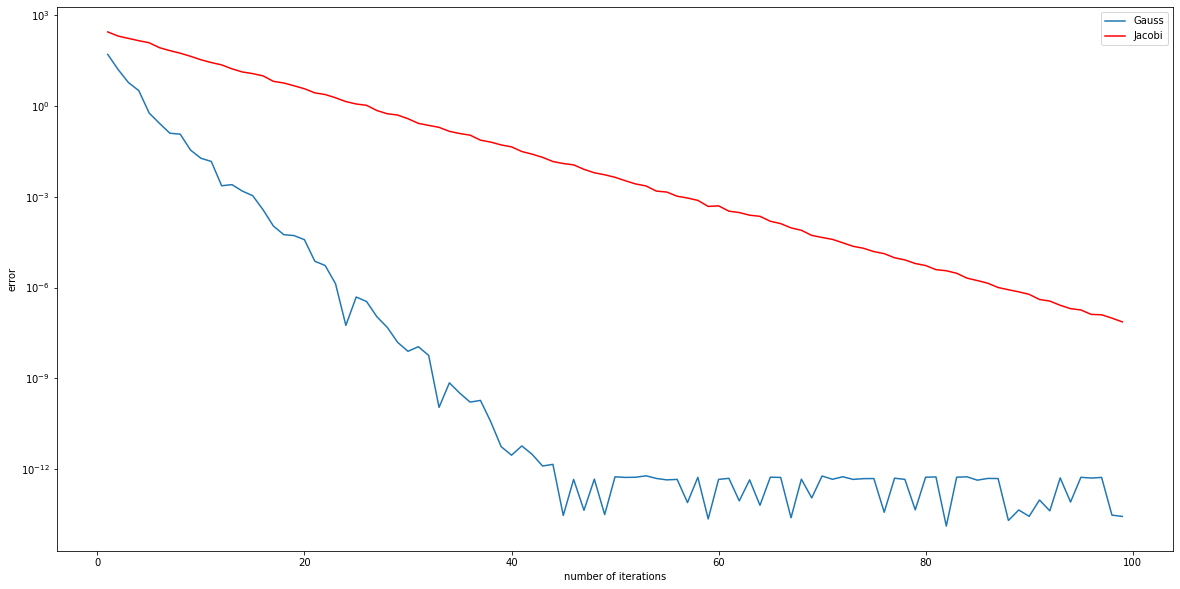

In [71]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(num_of_iterations, gauss_diff, label='Gauss');
ax.plot(num_of_iterations, jacobi_diff, color='red', label='Jacobi');
ax.set_yscale('log')
ax.set_ylabel('error')
ax.set_xlabel('number of iterations')
ax.legend();
plt.savefig('gauss_jacobi3.pdf')